## Linear Regression ##
Richard Sowers 2018-05-16
Pavle Coric 2018-05-17

Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license

In [1]:
import numpy
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
numpy.random.seed(0)
#tf.set_random_seed(0)
N=100
err_scale=0.1
M=2
B=3

In [3]:
xvals=numpy.random.normal(size=N)
yvals=M*xvals+B+numpy.random.normal(scale=err_scale,size=N)
data=[(x,y) for (x,y) in zip(xvals,yvals)]
print(data[:10])

[(1.764052345967664, 6.716419761640953), (0.4001572083672233, 3.665538510620202), (0.9787379841057392, 4.830427468362905), (2.240893199201458, 7.578726069218717), (1.8675579901499675, 6.617803639788519), (-0.977277879876411, 1.2398063588121073), (0.9500884175255894, 4.858814936975204), (-0.1513572082976979, 2.6225401022605284), (-0.10321885179355784, 2.9858564990609224), (0.41059850193837233, 3.9692484830201873)]


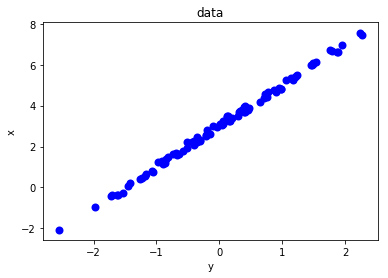

In [4]:
plt.figure()
plt.scatter(xvals,yvals,color="blue",linewidth=2)
plt.ylabel("x")
plt.xlabel("y")
plt.title("data")
plt.show()
plt.close()

In [5]:
#Create placeholders for TensorFlow X and Y
X = tf.placeholder(tf.float32, name="X") 
Y = tf.placeholder(tf.float32, name="Y")

In [6]:
print(X)
print(Y)

Tensor("X:0", dtype=float32)
Tensor("Y:0", dtype=float32)


In [7]:
#Create slope and bias
# Step 3: create weight and bias, initialized to 0 
w = tf.Variable(0.0, name="weights") 
b = tf.Variable(0.0, name="bias") 

In [8]:
print(w)
print(b)

<tf.Variable 'weights:0' shape=() dtype=float32_ref>
<tf.Variable 'bias:0' shape=() dtype=float32_ref>


In [9]:
#Create prediction model
Y_predicted = X * w + b

In [10]:
#Create loss function, used mse
loss = tf.square(Y - Y_predicted, name="loss") 

In [11]:
#Create Optimizer Function
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss) 

In [16]:
CTR_MAX=20
#Start Session
with tf.Session() as sess: 
    # Step 7: initialize the necessary variables, in this case, w and b 
    sess.run(tf.global_variables_initializer())  
 
    #Train the Model 
    for ctr in range(CTR_MAX): # run 100 epochs 
        for x, y in data: # Session runs train_op to minimize loss 
            sess.run(optimizer, feed_dict={X: x, Y:y})
        print("Current estimates are: "+str(sess.run([w,b])))
 
    # Step 9: output the values of w and b 
    w_value, b_value = sess.run([w, b]) 

InvalidArgumentError: You must feed a value for placeholder tensor 'X' with dtype float
	 [[Node: X = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'X', defined at:
  File "C:\Users\richa\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\richa\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\richa\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\richa\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\richa\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\richa\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\richa\Anaconda3\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\richa\Anaconda3\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\richa\Anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\richa\Anaconda3\lib\site-packages\tornado\ioloop.py", line 759, in _run_callback
    ret = callback()
  File "C:\Users\richa\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\richa\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "C:\Users\richa\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\richa\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\richa\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\richa\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\richa\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\richa\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\richa\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\richa\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\richa\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\richa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\richa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\richa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\richa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-a1f4770214b2>", line 2, in <module>
    X = tf.placeholder(tf.float32, name="X")
  File "C:\Users\richa\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1808, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\richa\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 5835, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\richa\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\richa\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "C:\Users\richa\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'X' with dtype float
	 [[Node: X = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [ ]:
(m,b)= w_value, b_value
print("estimated (m,b)="+str((m,b)))